In [1]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 9})

In [2]:
import sys
sys.path.append("../src/")

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import layers
import losses
import models
import utils

/cluster/tufts/hugheslabkp/eharve06/miniconda3/envs/l3d_2024f_cuda12_1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
################################################################################
def print_job(
    alpha, beta, criterion, delta, deltaS, epochs, embedding_level, 
    experiments_directory, lr, N_test, N_train, N_val, pooling, save, seed, 
    use_pos_embedding, weight_decay
):
    model_name = f"alpha={alpha}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    #model_name = f"alpha={alpha}_beta={beta}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    
    if os.path.exists(f'{experiments_directory}/{model_name}.csv'):
        temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
        if temp_df.shape[0] == epochs:
            return
    
    command = (
        f"python ../src/toy_data.py "
        f"--alpha={alpha} "
        #f"--beta={beta} "
        f"--batch_size={batch_size} "
        f"--criterion='{criterion}' "
        f"--delta={delta} "
        f"--deltaS={deltaS} "
        f"--epochs={epochs} "
        f"{'--embedding_level' if embedding_level else ''} "
        f"--experiments_directory='{experiments_directory}' "
        f"--lr={lr} "
        f"--model_name='{model_name}' "
        f"--N_test={N_test} "
        f"--N_train={N_train} "
        f"--N_val={N_val} "
        f"--pooling='{pooling}' "
        f"{'--save' if save else ''} "
        f"--seed={seed} "
        f"{'--use_pos_embedding' if use_pos_embedding else ''} "
        f"--weight_decay={weight_decay}"
    )
    
    print(f'    "{command}"')

In [64]:
# Varying delta
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [1.0]
batch_size = 64
#criterions = ["L1", "L2"]
criterions = ["L1"]
data_seed_test, data_seed_train, data_seed_val = 2, 0, 1
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
deltaS = 3
epochs = 1000
embedding_level = False
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_instance_level=True" 
lrs = [0.1, 0.01, 0.001, 0.0001]
N_train = 400
N_test = 1000
N_val = 100
poolings = ["max", "mean", "attention", "transformer"]
poolings = ["max", "mean", "attention"]
save = False
seeds = [1001]
use_pos_embedding = False
weight_decay = 0.0

#for alpha, criterion, delta, lr, pooling, seed in itertools.product(alphas, criterions, deltas, lrs, poolings, seeds):
for alpha, beta, criterion, delta, lr, pooling, seed in itertools.product(alphas, betas, criterions, deltas, lrs, poolings, seeds):
    dataset_folder = f"delta={delta}_deltaS={deltaS}_S_low=15_S_high=46"
    datasplit_folder = f"data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test={N_test}_N_train={N_train}_N_val={N_val}"
    temp_experiments_directory = f"{experiments_directory}/{dataset_folder}/{datasplit_folder}" 

    print_job(alpha, beta, criterion, delta, deltaS, epochs, embedding_level,
              temp_experiments_directory, lr, N_test, N_train, N_val, pooling, save, 
              seed, use_pos_embedding, weight_decay)

In [19]:
# Varying delta
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [1.0]
batch_size = 64
#criterions = ["L1", "L2"]
criterions = ["GuidedL1"]
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
deltaS = 3
epochs = 1000
embedding_level = True
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_embedding_level=True"
lrs = [0.1, 0.01, 0.001, 0.0001]
N_train = 400
N_test = 1000
N_val = 100
poolings = ["max", "mean", "attention", "transformer"]
poolings = ["transformer"]
save = False
seeds = [1001]
use_pos_embedding = False
weight_decay = 0.0

columns = ["model_name", "delta", "seed", "test_acc", "test_auroc", "test_auprc", "test_loss", "test_nll", "train_acc", "train_auroc", "train_auprc", "train_loss", "train_nll", "val_acc", "val_auroc", "val_auprc", "val_loss", "val_nll"]
df = pd.DataFrame(columns=columns)

#for alpha, criterion, delta, lr, pooling, seed in itertools.product(alphas, criterions, deltas, lrs, poolings, seeds):
for alpha, beta, criterion, delta, lr, pooling, seed in itertools.product(alphas, betas, criterions, deltas, lrs, poolings, seeds):
    
    dataset_folder = f"delta={delta}_deltaS={deltaS}_S_low=15_S_high=46"
    datasplit_folder = f"data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test={N_test}_N_train={N_train}_N_val={N_val}"
    temp_experiments_directory = f"{experiments_directory}/{dataset_folder}/{datasplit_folder}" 
    #model_name = f"alpha={alpha}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    model_name = f"alpha={alpha}_beta={beta}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"

    if os.path.exists(f"{temp_experiments_directory}/{model_name}.csv"):
        temp_df = pd.read_csv(f"{temp_experiments_directory}/{model_name}.csv")
        if len(temp_df[temp_df.train_auroc>temp_df.val_auroc]):
            index = temp_df[temp_df.train_auroc>temp_df.val_auroc].val_auroc.idxmax()
            row = [model_name, delta, seed, temp_df.test_acc.values[index], temp_df.test_auroc.values[index], temp_df.test_auprc.values[index], temp_df.test_loss.values[index], temp_df.test_nll.values[index], temp_df.train_acc.values[index], temp_df.train_auroc.values[index], temp_df.train_auprc.values[index], temp_df.train_loss.values[index], temp_df.train_nll.values[index], temp_df.val_acc.values[index], temp_df.val_auroc.values[index], temp_df.val_auprc.values[index], temp_df.val_loss.values[index], temp_df.val_nll.values[index]]
            df.loc[len(df)] = row
        
indices = df.groupby(["delta", "seed"])["val_auroc"].idxmax()
df = df.loc[indices].reset_index(drop=True)
df

,model_name,delta,seed,test_acc,test_auroc,test_auprc,test_loss,test_nll,train_acc,train_auroc,train_auprc,train_loss,train_nll,val_acc,val_auroc,val_auprc,val_loss,val_nll
0,alpha=0.001_beta=1.0_criterion=GuidedL1_lr=0.1...,0.5,1001,0.512,0.526531,0.535607,5.021445,4.452376,1.0,1.0,1.0,0.580379,0.000710,0.62,0.676459,0.712616,3.857347,3.288027
1,alpha=0.001_beta=1.0_criterion=GuidedL1_lr=0.0...,1.0,1001,0.553,0.564959,0.558797,4.888891,3.616899,1.0,1.0,1.0,1.273802,0.000461,0.66,0.703590,0.715310,3.511008,2.238766
2,alpha=0.0001_beta=1.0_criterion=GuidedL1_lr=0....,1.5,1001,0.655,0.716808,0.705325,2.735567,2.564851,1.0,1.0,1.0,0.171056,0.000062,0.73,0.799266,0.802851,2.027456,1.856489
3,alpha=0.001_beta=1.0_criterion=GuidedL1_lr=0.1...,2.0,1001,0.746,0.836010,0.842054,5.128329,0.588278,1.0,1.0,1.0,5.137134,0.020474,0.83,0.911465,0.934661,4.933617,0.393316
4,alpha=0.001_beta=1.0_criterion=GuidedL1_lr=0.1...,2.5,1001,0.849,0.936396,0.939903,7.015752,0.367144,1.0,1.0,1.0,7.547438,0.022929,0.89,0.974296,0.982106,6.858372,0.209515
5,alpha=0.001_beta=1.0_criterion=GuidedL1_lr=0.0...,3.0,1001,0.930,0.982860,0.982979,3.570940,0.180249,1.0,1.0,1.0,3.446650,0.011035,0.98,0.996328,0.997437,3.483248,0.092306
6,alpha=0.001_beta=1.0_criterion=GuidedL1_lr=0.1...,3.5,1001,0.967,0.995321,0.995130,0.590729,0.102961,1.0,1.0,1.0,0.492241,0.000936,0.99,1.000000,1.000000,0.512991,0.024973
7,alpha=0.001_beta=1.0_criterion=GuidedL1_lr=0.1...,4.0,1001,0.988,0.999344,0.999347,2.435921,0.036796,1.0,1.0,1.0,2.423722,0.003687,0.99,1.000000,1.000000,2.413986,0.014611
8,alpha=0.001_beta=1.0_criterion=GuidedL1_lr=0.1...,4.5,1001,0.997,0.999940,0.999942,1.754543,0.011680,1.0,1.0,1.0,1.751592,0.001312,1.00,1.000000,1.000000,1.748315,0.005202
9,alpha=0.001_beta=1.0_criterion=GuidedL1_lr=0.1...,5.0,1001,0.999,1.000000,1.000000,2.197228,0.005194,1.0,1.0,1.0,2.204990,0.002154,1.00,1.000000,1.000000,2.194845,0.002560


In [20]:
df.test_auroc.values

array([0.52653086, 0.56495863, 0.71680754, 0.83601004, 0.9363957 ,
       0.98285973, 0.99532086, 0.99934381, 0.99993992, 0.99999988])

In [23]:
# Varying N
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
batch_size = 64
#criterions = ['L1', 'L2']
criterions = ['L1']
delta = 2.0
deltaS = 3
epochs = 1000
embedding_level = True
#experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_instance_level=True" 
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_embedding_level=True" 
lrs = [0.1, 0.01, 0.001, 0.0001]
N_trains = [100, 158, 251, 398, 630, 1000, 1584, 2511, 3981, 6309, 10000]
N_trains = [1584, 2511, 3981, 6309, 10000]
N_test = 1000
N_vals = [25, 39, 62, 99, 157, 250, 396, 627, 995, 1577, 2500]
N_vals = [396, 627, 995, 1577, 2500]
poolings = ["max", "mean", "attention", "transformer"]
#poolings = ["max", "mean", "attention"]
save = False
seeds = [1001]
use_pos_embedding = False
weight_decay = 0.0

for alpha, criterion, lr, (N_train, N_val), pooling, seed in itertools.product(alphas, criterions, lrs, zip(N_trains, N_vals), poolings, seeds):
    dataset_folder = f"delta={delta}_deltaS={deltaS}_S_low=15_S_high=46"
    datasplit_folder = f"data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test={N_test}_N_train={N_train}_N_val={N_val}"
    temp_experiments_directory = f"{experiments_directory}/{dataset_folder}/{datasplit_folder}" 
    
    print_job(alpha, beta, criterion, delta, deltaS, epochs, embedding_level,
              temp_experiments_directory,lr, N_test, N_train, N_val, pooling, save, 
              seed, use_pos_embedding, weight_decay)

    "python ../src/toy_data.py --alpha=1.0 --batch_size=64 --criterion='L1' --delta=2.0 --deltaS=3 --epochs=1000 --embedding_level --experiments_directory='/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_embedding_level=True/delta=2.0_deltaS=3_S_low=15_S_high=46/data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test=1000_N_train=1584_N_val=396' --lr=0.1 --model_name='alpha=1.0_criterion=L1_lr=0.1_pooling=max_seed=1001_use_pos_embedding=False' --N_test=1000 --N_train=1584 --N_val=396 --pooling='max'  --seed=1001  --weight_decay=0.0"
    "python ../src/toy_data.py --alpha=1.0 --batch_size=64 --criterion='L1' --delta=2.0 --deltaS=3 --epochs=1000 --embedding_level --experiments_directory='/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_embedding_level=True/delta=2.0_deltaS=3_S_low=15_S_high=46/data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test=1000_N_train=1584_N_val=396' --lr=0.1 --model_name='alpha=1.0_criterion=L1_lr=0.1_pooling=mean_seed=1001_u

In [22]:
# Varying N
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
batch_size = 64
#criterions = ["L1", "L2"]
criterions = ["L1"]
delta = 2.0
deltaS = 3
epochs = 1000
embedding_level = False
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_instance_level=True" 
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_embedding_level=True" 
lrs = [0.1, 0.01, 0.001, 0.0001]
N_trains = [100, 158, 251, 398, 630, 1000]#, 1584, 2511, 3981, 6309, 10000]
N_test = 1000
N_vals = [25, 39, 62, 99, 157, 250]#, 396, 627, 995, 1577, 2500]
poolings = ["max", "mean", "attention", "transformer"]
poolings = ["transformer"]
save = False
seeds = [1001]
use_pos_embedding = False
weight_decay = 0.0

columns = ["model_name", "N_train", "seed", "test_acc", "test_auroc", "test_auprc", "test_loss", "test_nll", "train_acc", "train_auroc", "train_auprc", "train_loss", "train_nll", "val_acc", "val_auroc", "val_auprc", "val_loss", "val_nll"]
df = pd.DataFrame(columns=columns)

for alpha, criterion, lr, (N_train, N_val), pooling, seed in itertools.product(alphas, criterions, lrs, zip(N_trains, N_vals), poolings, seeds):
    dataset_folder = f"delta={delta}_deltaS={deltaS}_S_low=15_S_high=46"
    datasplit_folder = f"data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test={N_test}_N_train={N_train}_N_val={N_val}"
    temp_experiments_directory = f"{experiments_directory}/{dataset_folder}/{datasplit_folder}" 
    model_name = f"alpha={alpha}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"

    if os.path.exists(f"{temp_experiments_directory}/{model_name}.csv"):
        temp_df = pd.read_csv(f"{temp_experiments_directory}/{model_name}.csv")
        if len(temp_df[temp_df.train_auroc>temp_df.val_auroc]):
            index = temp_df[temp_df.train_auroc>temp_df.val_auroc].val_auroc.idxmax()
            row = [model_name, N_train, seed, temp_df.test_acc.values[index], temp_df.test_auroc.values[index], temp_df.test_auprc.values[index], temp_df.test_loss.values[index], temp_df.test_nll.values[index], temp_df.train_acc.values[index], temp_df.train_auroc.values[index], temp_df.train_auprc.values[index], temp_df.train_loss.values[index], temp_df.train_nll.values[index], temp_df.val_acc.values[index], temp_df.val_auroc.values[index], temp_df.val_auprc.values[index], temp_df.val_loss.values[index], temp_df.val_nll.values[index]]
            df.loc[len(df)] = row
        
indices = df.groupby(["N_train", "seed"])["val_auroc"].idxmax()
df = df.loc[indices].reset_index(drop=True)
df

,model_name,N_train,seed,test_acc,test_auroc,test_auprc,test_loss,test_nll,train_acc,train_auroc,train_auprc,train_loss,train_nll,val_acc,val_auroc,val_auprc,val_loss,val_nll
0,alpha=0.01_criterion=L1_lr=0.01_pooling=transf...,100,1001,0.492,0.533745,0.527065,31.265976,0.699297,0.531250,0.936765,0.930793,31.375854,0.692042,0.520000,0.907051,0.867204,31.260593,0.693914
1,alpha=0.01_criterion=L1_lr=0.01_pooling=transf...,158,1001,0.492,0.500442,0.517252,30.123268,0.693432,0.507812,0.697680,0.732570,30.288553,0.698357,0.641026,0.662857,0.505547,30.136602,0.706766
2,alpha=0.001_criterion=L1_lr=0.1_pooling=transf...,251,1001,0.614,0.748624,0.734880,4.017583,3.617070,0.963542,0.996623,0.997134,0.497543,0.088956,0.790323,0.883403,0.915800,1.984971,1.584457
3,alpha=0.0001_criterion=L1_lr=0.1_pooling=trans...,398,1001,0.748,0.824355,0.826179,1.658166,1.410029,1.000000,1.000000,1.000000,0.248980,0.000332,0.818182,0.931020,0.925626,0.890230,0.642093
4,alpha=1e-05_criterion=L1_lr=0.1_pooling=transf...,630,1001,0.757,0.852340,0.859137,1.137204,1.098767,1.000000,1.000000,1.000000,0.038576,0.000070,0.834395,0.906686,0.903129,0.829409,0.790971
5,alpha=0.001_criterion=L1_lr=0.1_pooling=transf...,1000,1001,0.735,0.832317,0.832377,6.471410,0.693110,0.986458,0.998954,0.998985,7.196095,0.056574,0.792000,0.884534,0.904269,6.285449,0.507149


In [15]:
df.test_auroc.values

array([0.83920681, 0.83130884, 0.8430478 , 0.83972704, 0.84314382,
       0.80154121])

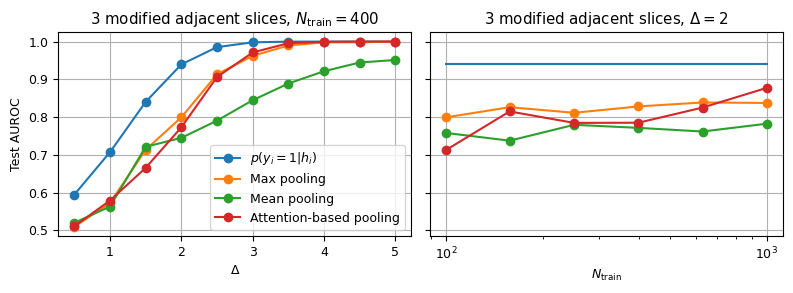

In [83]:
# L1
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
bayes_aurocs = [0.5946202278137207, 0.7070890069007874, 0.8402831554412842, 0.9396085739135742, 0.9853242635726929, 0.9980275630950928, 0.9998959302902222, 0.9999998807907104, 0.9999999403953552, 0.9999999403953552]
#max_aurocs = [0.53509301, 0.5990054 , 0.71506703, 0.79767615, 0.90681213, 0.96464294, 0.99092573, 0.99827158, 0.9925701 , 0.99978387]
#mean_aurocs = [0.52007717, 0.56286412, 0.71434689, 0.78237629, 0.78387272, 0.84144741, 0.88435847, 0.91891927, 0.94186521, 0.94876492]
#attention_aurocs = [0.50768602, 0.57043403, 0.63321811, 0.76908088, 0.88953567, 0.97094458, 0.99492669, 0.9995119 , 0.99996793, 0.99999994]
max_aurocs = [0.50939441, 0.5724225 , 0.71332663, 0.79945076, 0.91336578, 0.96227837, 0.98967338, 0.99791551, 0.9982276 , 0.99998796]
mean_aurocs = [0.51986909, 0.56306016, 0.72127265, 0.74496269, 0.79056633, 0.84471428, 0.88895154, 0.92152393, 0.9445619 , 0.95127153]
attention_aurocs = [0.51072675, 0.57890421, 0.66549838, 0.77291787, 0.90620798, 0.97115672, 0.99573481, 0.99939978, 0.99997991, 0.99999988]

ncols, nrows = 2, 1
fig, axs = plt.subplots(figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows, sharey=True)

axs[0].plot(deltas, bayes_aurocs, label=r"$p(y_i=1|h_i)$", marker="o")
axs[0].plot(deltas, max_aurocs, label="Max pooling", marker="o")
axs[0].plot(deltas, mean_aurocs, label="Mean pooling", marker="o")
axs[0].plot(deltas, attention_aurocs, label="Attention-based pooling", marker="o")

axs[0].set_title(r"3 modified adjacent slices, $N_{\text{train}}=400$")
axs[0].set_xlabel(r"$\Delta$")
axs[0].set_ylabel("Test AUROC")
axs[0].legend(loc="lower right")
axs[0].grid()

N_trains = [100, 158, 251, 398, 630, 1000]#, 1584, 2511, 3981, 6309, 10000]
bayes_aurocs = [0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742]#, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742]
max_aurocs = [0.79922861, 0.82617551, 0.81138778, 0.82818407, 0.83871472, 0.8374024]
mean_aurocs = [0.75799811, 0.73751485, 0.77952754, 0.77141953, 0.76173103, 0.78252029]
attention_aurocs = [0.71253049, 0.8149966 , 0.78454089, 0.78508896, 0.82515526, 0.8774966]

axs[1].plot(N_trains, bayes_aurocs, label=r"$p(y_i=1|h_i)$")
axs[1].plot(N_trains, max_aurocs, label="Max pooling", marker="o")
axs[1].plot(N_trains, mean_aurocs, label="Mean pooling", marker="o")
axs[1].plot(N_trains, attention_aurocs, label="Attention-based pooling", marker="o")

axs[1].set_title(r"3 modified adjacent slices, $\Delta=2$")
axs[1].set_xlabel(r"$N_{\text{train}}$")
axs[1].set_xscale("log")
#axs[1].legend(loc="lower right")
axs[1].grid()

fig.tight_layout()
fig.savefig("instance-level_approach.pdf", bbox_inches="tight")
plt.show()

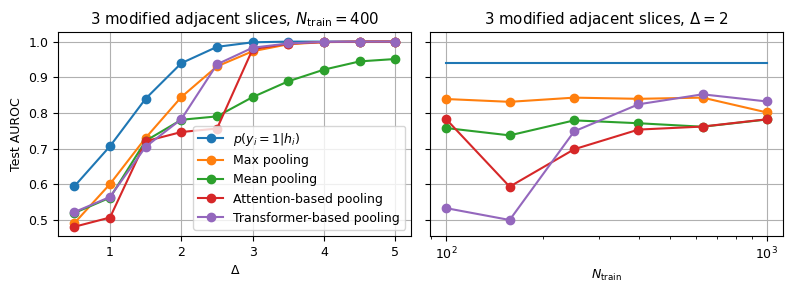

In [17]:
# L1
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
bayes_aurocs = [0.5946202278137207, 0.7070890069007874, 0.8402831554412842, 0.9396085739135742, 0.9853242635726929, 0.9980275630950928, 0.9998959302902222, 0.9999998807907104, 0.9999999403953552, 0.9999999403953552]
max_aurocs = [0.49145383, 0.60111392, 0.73047101, 0.84476829, 0.93063831, 0.97298902, 0.99260211, 0.99847162, 0.99980396, 0.99997592]
mean_aurocs = [0.51998907, 0.56290013, 0.72213286, 0.78105593, 0.79056633, 0.84471625, 0.88895154, 0.92155594, 0.9445619 , 0.95127147]
attention_aurocs = [0.48145124, 0.50732589, 0.72098058, 0.74676311, 0.7564857, 0.97901058, 0.99417847, 0.99879968, 0.99997592, 0.99999994]
transformer_aurocs = [0.52236974, 0.56498867, 0.70559061, 0.78284842, 0.93642163, 0.98287159, 0.9947046 , 0.99934787, 0.99987584, 0.99999994]
guided_aurocs = [0.52653086, 0.56495863, 0.71680754, 0.86097842, 0.92612511, 0.98035902, 0.99422657, 0.9996599 , 0.99997199, 0.99999994]

ncols, nrows = 2, 1
fig, axs = plt.subplots(figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows, sharey=True)

axs[0].plot(deltas, bayes_aurocs, label=r"$p(y_i=1|h_i)$", marker="o")
axs[0].plot(deltas, max_aurocs, label="Max pooling", marker="o")
axs[0].plot(deltas, mean_aurocs, label="Mean pooling", marker="o")
axs[0].plot(deltas, attention_aurocs, label="Attention-based pooling", marker="o")
axs[0].plot(deltas, transformer_aurocs, label="Transformer-based pooling", marker="o")
#axs[0].plot(deltas, guided_aurocs, label="Guided pooling", marker="o")

axs[0].set_title(r"3 modified adjacent slices, $N_{\text{train}}=400$")
axs[0].set_xlabel(r"$\Delta$")
axs[0].set_ylabel("Test AUROC")
axs[0].legend(loc="lower right")
axs[0].grid()

N_trains = [100, 158, 251, 398, 630, 1000]#, 1584, 2511, 3981, 6309, 10000]
bayes_aurocs = [0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742]#, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742]
max_aurocs = [0.83920681, 0.83130884, 0.8430478 , 0.83972704, 0.84314382, 0.80154121]
mean_aurocs = [0.75799805, 0.73737478, 0.77939558, 0.77136952, 0.76157498, 0.78188413]
attention_aurocs = [0.78364861, 0.59374005, 0.69853681, 0.75359094, 0.76203912, 0.78248435]
transformer_aurocs = [0.53374463, 0.50044215, 0.74862361, 0.82435507, 0.85234016, 0.83231711]

axs[1].plot(N_trains, bayes_aurocs, label=r"$p(y_i=1|h_i)$")
axs[1].plot(N_trains, max_aurocs, label="Max pooling", marker="o")
axs[1].plot(N_trains, mean_aurocs, label="Mean pooling", marker="o")
axs[1].plot(N_trains, attention_aurocs, label="Attention-based pooling", marker="o")
axs[1].plot(N_trains, transformer_aurocs, label="Transformer-based pooling", marker="o")

axs[1].set_title(r"3 modified adjacent slices, $\Delta=2$")
axs[1].set_xlabel(r"$N_{\text{train}}$")
axs[1].set_xscale("log")
#axs[1].legend(loc="lower right")
axs[1].grid()

fig.tight_layout()
fig.savefig("embedding-level_approach.pdf", bbox_inches="tight")
plt.show()